In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%matplotlib inline
import pandas_profiling
import warnings
warnings.filterwarnings('ignore')
import calendar

In [2]:
cust=pd.read_excel('E:/Dsc_analytixlabs/New_ML/Capstone Projects/14. Capstone Case Study - Finding-Marketing-Insights/Datasets/CustomersData.xlsx')
discount=pd.read_csv('E:/Dsc_analytixlabs/New_ML/Capstone Projects/14. Capstone Case Study - Finding-Marketing-Insights/Datasets/Discount_Coupon.csv')
marketing_spend=pd.read_csv('E:/Dsc_analytixlabs/New_ML/Capstone Projects/14. Capstone Case Study - Finding-Marketing-Insights/Datasets/Marketing_Spend.csv')
online_sales=pd.read_csv('E:/Dsc_analytixlabs/New_ML/Capstone Projects/14. Capstone Case Study - Finding-Marketing-Insights/Datasets/Online_Sales.csv')
tax=pd.read_excel('E:/Dsc_analytixlabs/New_ML/Capstone Projects/14. Capstone Case Study - Finding-Marketing-Insights/Datasets/Tax_amount.xlsx')

In [3]:
cust.head()

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [4]:
discount.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [5]:
discount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Month              204 non-null    object
 1   Product_Category   204 non-null    object
 2   Coupon_Code        204 non-null    object
 3   Discount_pct       204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [6]:
# There is a space in some columns
cols=[i.strip() for i in discount.columns]
discount.columns=cols

In [7]:
discount.Discount_pct=discount.Discount_pct/100

In [8]:
discount.Product_Category.unique()

array(['Apparel', 'Nest-USA', 'Office', 'Drinkware', 'Lifestyle', 'Bags',
       'Notebooks', 'Headgear', 'Nest', 'Waze', 'Bottles', 'Nest-Canada',
       'Housewares', 'Accessories', 'Gift Cards', 'Notebooks & Journals',
       'Android'], dtype=object)

In [9]:
marketing_spend.head()

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [10]:
marketing_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [11]:
marketing_spend["Date"] = pd.to_datetime(marketing_spend["Date"])
marketing_spend["Total_Spend"] = marketing_spend.Offline_Spend+ marketing_spend.Online_Spend

In [12]:
marketing_spend.head()

,Date,Offline_Spend,Online_Spend,Total_Spend
0,2019-01-01,4500,2424.50,6924.50
1,2019-01-02,4500,3480.36,7980.36
2,2019-01-03,4500,1576.38,6076.38
3,2019-01-04,4500,2928.55,7428.55
4,2019-01-05,4500,4055.30,8555.30


In [13]:
online_sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,20190101,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,20190101,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,20190101,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [14]:
online_sales.shape

(52924, 10)

In [15]:
online_sales.Product_Category.nunique()

20

In [16]:
tax.head()

,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


In [17]:
tax.shape

(20, 2)

In [18]:
sales_tax=pd.merge(online_sales,tax,on='Product_Category')

In [19]:
sales_tax.shape

(52924, 11)

In [20]:
sales_tax['Transaction_Date']=pd.to_datetime(sales_tax.Transaction_Date, format='%Y%m%d')

In [21]:
#sales_tax['Transaction_Month']=sales_tax.Transaction_Date.dt.month
import calendar
sales_tax["Month"]=sales_tax.Transaction_Date.dt.month.apply(lambda x:calendar.month_abbr[x])

In [22]:
sales_tax.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Month
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,Jan
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,Jan
2,13047,16684,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.5,Clicked,0.1,Jan
3,13047,16684,2019-01-01,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,1,81.50,6.5,Used,0.1,Jan
4,13047,16688,2019-01-01,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,122.77,6.5,Used,0.1,Jan


In [23]:
df=pd.merge(cust,sales_tax,on='CustomerID').sort_values(by=['Transaction_Date','CustomerID'])

In [24]:
df.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Month
341,12583,M,Chicago,33,16694,2019-01-01,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,122.77,6.50,Not Used,0.1,Jan
346,12583,M,Chicago,33,16692,2019-01-01,GGOEAFKQ020599,Android Sticker Sheet Ultra Removable,Office,1,2.47,102.79,Used,0.1,Jan
347,12583,M,Chicago,33,16692,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,1.64,102.79,Clicked,0.1,Jan
348,12583,M,Chicago,33,16692,2019-01-01,GGOEYFKQ020699,YouTube Custom Decals,Office,1,1.64,102.79,Clicked,0.1,Jan
349,12583,M,Chicago,33,16696,2019-01-01,GGOEGKAA019299,Switch Tone Color Crayon Pen,Office,1,1.64,6.50,Used,0.1,Jan


In [25]:
df.shape

(52924, 15)

In [26]:
 df1=pd.merge(df,marketing_spend,left_on='Transaction_Date',right_on='Date')

In [27]:
df1

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Month,Date,Offline_Spend,Online_Spend,Total_Spend
0,12583,M,Chicago,33,16694,2019-01-01,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,122.77,6.50,Not Used,0.10,Jan,2019-01-01,4500,2424.50,6924.50
1,12583,M,Chicago,33,16692,2019-01-01,GGOEAFKQ020599,Android Sticker Sheet Ultra Removable,Office,1,2.47,102.79,Used,0.10,Jan,2019-01-01,4500,2424.50,6924.50
2,12583,M,Chicago,33,16692,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,1.64,102.79,Clicked,0.10,Jan,2019-01-01,4500,2424.50,6924.50
3,12583,M,Chicago,33,16692,2019-01-01,GGOEYFKQ020699,YouTube Custom Decals,Office,1,1.64,102.79,Clicked,0.10,Jan,2019-01-01,4500,2424.50,6924.50
4,12583,M,Chicago,33,16696,2019-01-01,GGOEGKAA019299,Switch Tone Color Crayon Pen,Office,1,1.64,6.50,Used,0.10,Jan,2019-01-01,4500,2424.50,6924.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,15781,M,New Jersey,19,48485,2019-12-31,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,151.88,6.50,Clicked,0.10,Dec,2019-12-31,4000,2058.75,6058.75
52920,15781,M,New Jersey,19,48488,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,0.10,Dec,2019-12-31,4000,2058.75,6058.75
52921,15781,M,New Jersey,19,48489,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,2,80.52,6.50,Clicked,0.10,Dec,2019-12-31,4000,2058.75,6058.75
52922,15781,M,New Jersey,19,48489,2019-12-31,GGOEGAEQ027917,Google Women's Short Sleeve Hero Tee White,Apparel,1,3.47,6.50,Used,0.18,Dec,2019-12-31,4000,2058.75,6058.75


In [28]:
df_final=pd.merge(df1,discount,on=['Month','Product_Category'],how='left')

In [29]:
df_final.sample(7)

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,...,Delivery_Charges,Coupon_Status,GST,Month,Date,Offline_Spend,Online_Spend,Total_Spend,Coupon_Code,Discount_pct
45131,13089,F,New Jersey,25,42701,2019-11-06,GGOENEBQ086799,Nest Thermostat E - USA,Nest,1,...,6.0,Clicked,0.05,Nov,2019-11-06,3500,2546.60,6046.60,NE20,0.2
25939,12423,M,New York,9,32441,2019-07-12,GGOEGAWQ062948,Google Baby Essentials Set,Apparel,1,...,6.0,Used,0.18,Jul,2019-07-12,2500,923.40,3423.40,SALE10,0.1
8117,15898,M,Chicago,27,22091,2019-03-05,GGOEGAAR010713,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,1,...,6.5,Used,0.18,Mar,2019-03-05,2500,1153.36,3653.36,SALE30,0.3
6281,12748,F,Chicago,28,20874,2019-02-20,GGOEGAEJ035316,Google Vintage Henley Grey/Black,Apparel,1,...,6.5,Not Used,0.18,Feb,2019-02-20,3500,2768.28,6268.28,SALE20,0.2
35591,18085,M,Chicago,34,36910,2019-08-29,GGOEGALP036315,Google Women's Long Sleeve Tee Lavender,Apparel,1,...,6.0,Clicked,0.18,Aug,2019-08-29,3000,1056.67,4056.67,SALE20,0.2
21932,16725,F,Chicago,48,30199,2019-06-12,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,...,6.0,Used,0.10,Jun,2019-06-12,3000,2321.52,5321.52,ELEC30,0.3
6040,17059,M,California,24,20708,2019-02-17,GGOEWEBB082699,Waze Mobile Phone Vent Mount,Waze,1,...,6.5,Clicked,0.18,Feb,2019-02-17,3000,2107.67,5107.67,WEMP20,0.2


In [30]:
df_final.drop(['Transaction_Date'],axis=1,inplace=True)

In [31]:
df_final.shape

(52924, 20)

In [32]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52924 entries, 0 to 52923
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Gender               52924 non-null  object        
 2   Location             52924 non-null  object        
 3   Tenure_Months        52924 non-null  int64         
 4   Transaction_ID       52924 non-null  int64         
 5   Product_SKU          52924 non-null  object        
 6   Product_Description  52924 non-null  object        
 7   Product_Category     52924 non-null  object        
 8   Quantity             52924 non-null  int64         
 9   Avg_Price            52924 non-null  float64       
 10  Delivery_Charges     52924 non-null  float64       
 11  Coupon_Status        52924 non-null  object        
 12  GST                  52924 non-null  float64       
 13  Month                52924 non-

In [33]:
df_final.fillna(0,inplace=True)

In [34]:
df_final.isnull().sum()

CustomerID             0
Gender                 0
Location               0
Tenure_Months          0
Transaction_ID         0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
GST                    0
Month                  0
Date                   0
Offline_Spend          0
Online_Spend           0
Total_Spend            0
Coupon_Code            0
Discount_pct           0
dtype: int64

In [35]:
df_final['Invoice_Value'] =(( df_final.Quantity*df_final.Avg_Price)*(1-df_final.Discount_pct)*(1+df_final.GST))+df_final.Delivery_Charges

In [36]:
df_final.to_csv('E:/Dsc_analytixlabs/New_ML/Capstone Projects/14. Capstone Case Study - Finding-Marketing-Insights/Final_data.csv')

In [37]:
data=df_final.copy()

In [38]:
data.CustomerID.duplicated().sum()

51456

In [39]:
data.CustomerID.nunique()

1468

## EDA

### Understanding how many customers acquired every month

In [40]:

cust_month = data[~data.CustomerID.duplicated()].groupby("Month")["CustomerID"].count().reindex(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]).reset_index()
cust_month

,Month,CustomerID
0,Jan,215
1,Feb,96
2,Mar,177
3,Apr,163
4,May,112
5,Jun,137
6,Jul,94
7,Aug,135
8,Sep,78
9,Oct,87


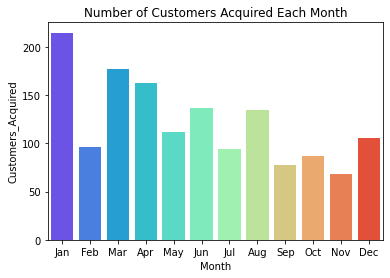

In [41]:
cust_month.columns = ["Month","Customers_Acquired"]
sns.barplot(x='Month',y='Customers_Acquired', data=cust_month,palette='rainbow')
plt.title("Number of Customers Acquired Each Month")
plt.show()

### Understand the retention of customers on month on month basis

In [42]:
cust_month['At_end'] = data.groupby('Month')['CustomerID'].nunique().reindex(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]).values
cust_month['In_Beginning'] = cust_month.At_end.shift(1).fillna(0)
cust_month['Retention'] = ((cust_month.At_end - cust_month.Customers_Acquired)/cust_month.In_Beginning)*100
cust_month = cust_month.fillna(0)


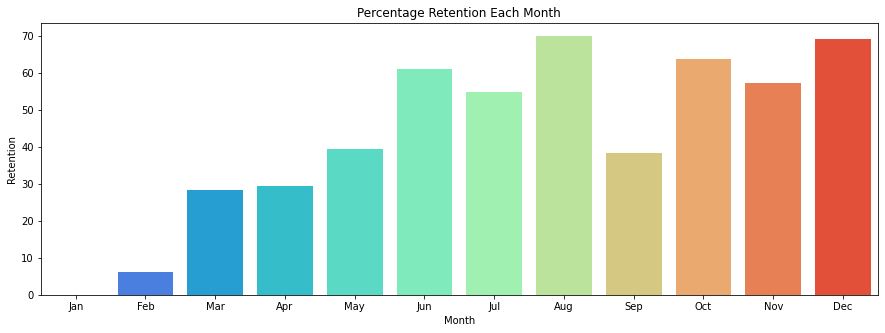

In [43]:
plt.figure(figsize = (15,5))
sns.barplot(x='Month',y='Retention', data=cust_month,palette='rainbow')
plt.title("Percentage Retention Each Month")
plt.show()

In [44]:
cust_month[['In_Beginning','At_end','Retention']]

,In_Beginning,At_end,Retention
0,0.0,215,0.000000
1,215.0,109,6.046512
2,109.0,208,28.440367
3,208.0,224,29.326923
4,224.0,200,39.285714
5,200.0,259,61.000000
6,259.0,236,54.826255
7,236.0,300,69.915254
8,300.0,193,38.333333
9,193.0,210,63.730570


### How the revenues from existing/new customers on month on month basis 

In [45]:
# How the revenues from existing/new customers on month on month basis
# ALL THE CUSTOMERS THAT ARE NEW IN ANY MONTH
df_new = data[~data.CustomerID.duplicated()].groupby("Month")[["CustomerID","Invoice_Value"]].agg({"CustomerID":"count","Invoice_Value":sum}).reindex(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]).reset_index()
# ALL THE CUSTOMERS THAT ARE ALREADY CUSTOMERS
df_existing = data[data.CustomerID.duplicated()].groupby("Month")[["CustomerID","Invoice_Value"]].agg({"CustomerID":"count","Invoice_Value":sum}).reindex(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]).reset_index()

In [46]:
df_new

,Month,CustomerID,Invoice_Value
0,Jan,215,35735.89851
1,Feb,96,12898.27432
2,Mar,177,21696.92039
3,Apr,163,23919.05286
4,May,112,14957.57224
5,Jun,137,16035.25412
6,Jul,94,13407.11468
7,Aug,135,18859.56384
8,Sep,78,10257.79992
9,Oct,87,14830.23526


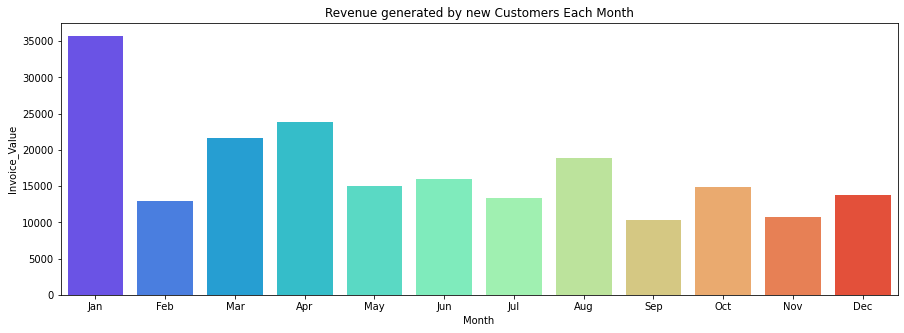

In [47]:
plt.figure(figsize = (15,5))
sns.barplot(x='Month',y='Invoice_Value', data=df_new, palette='rainbow')
plt.title("Revenue generated by new Customers Each Month")
plt.show()

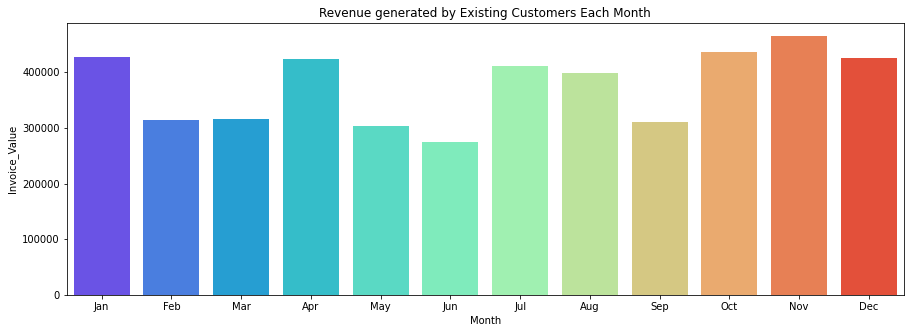

In [48]:
plt.figure(figsize = (15,5))
sns.barplot(x='Month',y='Invoice_Value', data=df_existing, palette='rainbow')
plt.title("Revenue generated by Existing Customers Each Month")
plt.show()

### # How the discounts playing role in the revenues?

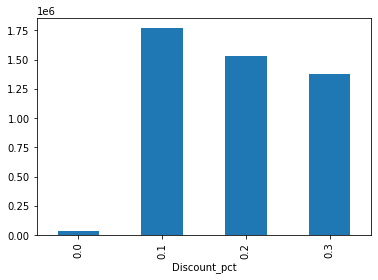

In [49]:
df_discount_rev=data.groupby('Discount_pct')['Invoice_Value'].sum()
df_discount_rev.plot(kind='bar')
plt.show()

 The 10% Discount play a significant role in the Revenue

## Analyse KPI’s like Revenue, number of orders, average order value, number of customers (existing/new), quantity, by category, by month, by week, by day 

### By Category

In [50]:
# quantity, by category
df_category=data.groupby('Product_Category').agg({"Invoice_Value":"sum","Transaction_ID":"count"}).round().reset_index()
df_category["Average Order Value"] = df_category.Invoice_Value/df_category.Transaction_ID
df_category.columns = ['Product_Category', 'Invoice_Value', 'Number_of _transaction',
       'Average Order Value']

In [51]:
df_category

,Product_Category,Invoice_Value,Number_of _transaction,Average Order Value
0,Accessories,9277.0,234,39.645299
1,Android,986.0,43,22.930233
2,Apparel,735450.0,18126,40.574313
3,Backpacks,10813.0,89,121.494382
4,Bags,168853.0,1882,89.719979
5,Bottles,9310.0,268,34.738806
6,Drinkware,240268.0,3483,68.983061
7,Fun,8995.0,160,56.218750
8,Gift Cards,17575.0,159,110.534591
9,Google,13169.0,105,125.419048


# by Month

In [52]:
df_month = data.groupby("Month").agg({"Invoice_Value":"sum","Transaction_ID":"count"}).round().reindex(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]).reset_index()
df_month["Average Order Value"] = df_month.Invoice_Value/df_month.Transaction_ID
df_month.columns = ['Month','Invoice_Value', 'Transaction_ID(Count)',
       'Average Order Value']


In [53]:
df_month

,Month,Invoice_Value,Transaction_ID(Count),Average Order Value
0,Jan,463883.0,4063,114.172533
1,Feb,327897.0,3284,99.846833
2,Mar,336805.0,4346,77.497699
3,Apr,447999.0,4150,107.951566
4,May,318556.0,4572,69.675416
5,Jun,289830.0,4193,69.122347
6,Jul,423982.0,5251,80.743097
7,Aug,418161.0,6150,67.993659
8,Sep,321128.0,4288,74.889925
9,Oct,450837.0,4164,108.270173


# by week

In [54]:
data["Week"] = data.Date.dt.isocalendar().week
df_week = data.groupby("Week").agg({"Invoice_Value":"sum","Transaction_ID":"count"}).reset_index()
df_week["Average Order Value"] = df_week.Invoice_Value/df_week.Transaction_ID
df_week.columns = ['Week','Invoice_Value', 'Transaction_ID(Count)','Average Order Value']

In [55]:
df_week

,Week,Invoice_Value,Transaction_ID(Count),Average Order Value
0,1,119476.36561,1056,113.140498
1,2,98081.41564,829,118.312926
2,3,100403.60143,842,119.244182
3,4,103231.57870,943,109.471451
4,5,96555.27441,926,104.271355
5,6,78196.22616,749,104.400836
6,7,87244.71836,881,99.029192
7,8,86611.15736,876,98.871184
8,9,70089.67011,810,86.530457
9,10,76487.70050,1012,75.580732


### Understand the trends/seasonality of sales by category, location, month

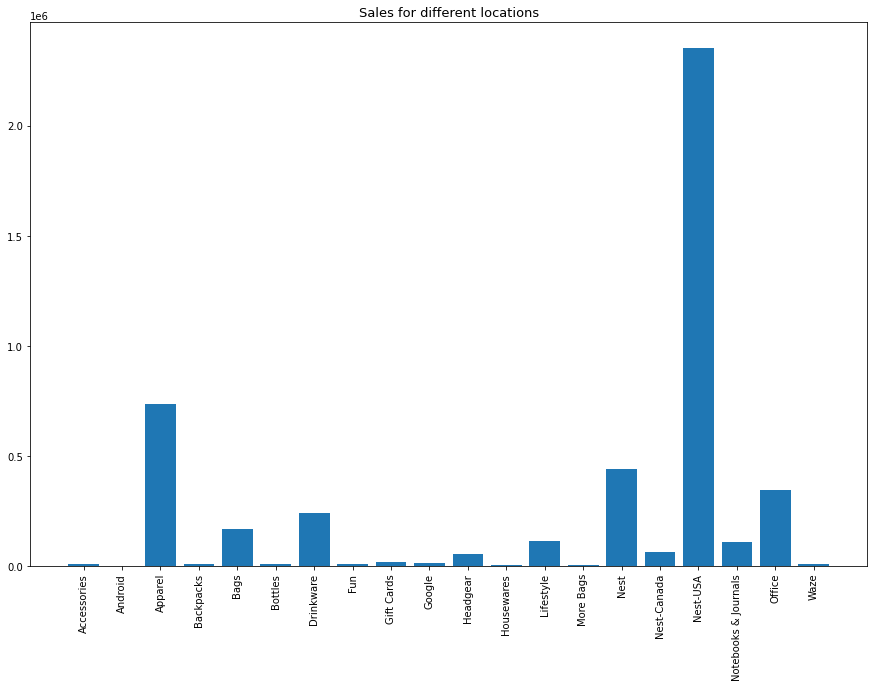

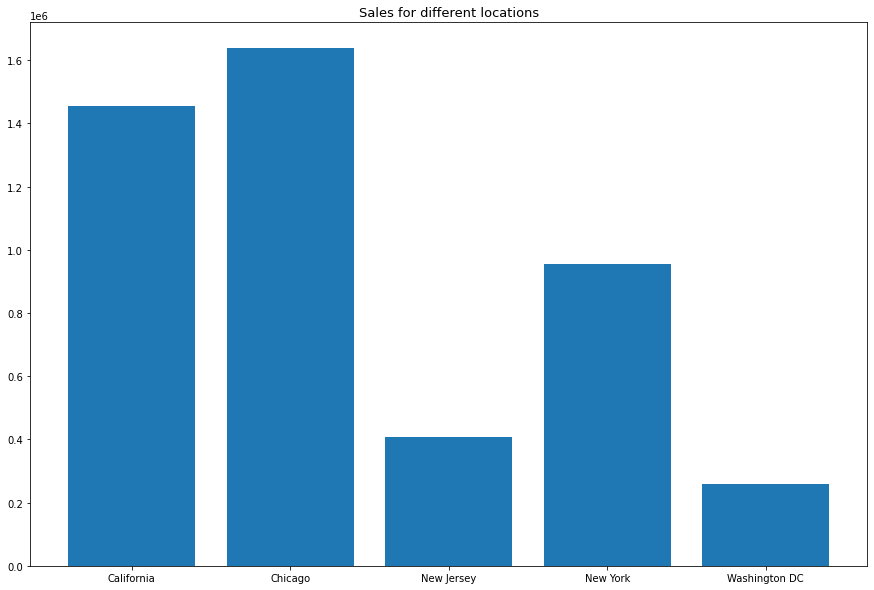

In [56]:
category = data.groupby("Product_Category")["Invoice_Value"].sum().reset_index()
plt.figure(figsize=(15,10))
plt.bar(category.Product_Category,category.Invoice_Value)
plt.xticks(rotation=90)
plt.title("Sales for different locations",size=13)

location = data.groupby("Location")["Invoice_Value"].sum().reset_index()
plt.figure(figsize=(15,10))
plt.bar(location.Location,location.Invoice_Value)
plt.title("Sales for different locations",size=13)
plt.show()

### How number order varies and sales with different days?

Text(0.5, 1.0, 'Number of orders placed on each day')

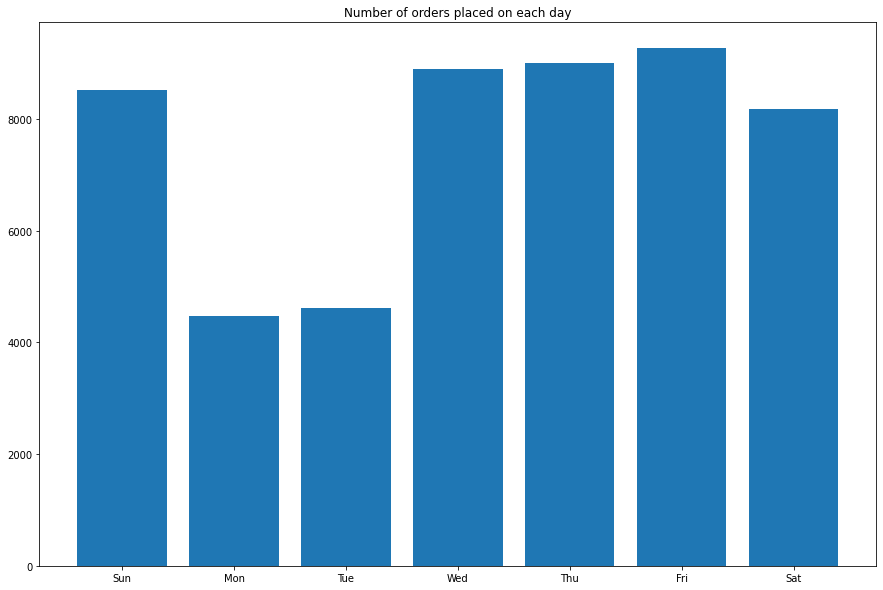

In [57]:
data["Day"] = data.Date.dt.weekday.apply(lambda x: calendar.day_abbr[x])

orders = data.groupby("Day")["Transaction_ID"].count().reindex(["Sun","Mon","Tue","Wed","Thu","Fri","Sat"]).reset_index()
plt.figure(figsize=(15,10))
plt.bar(orders.Day,orders.Transaction_ID)

plt.title("Number of orders placed on each day")

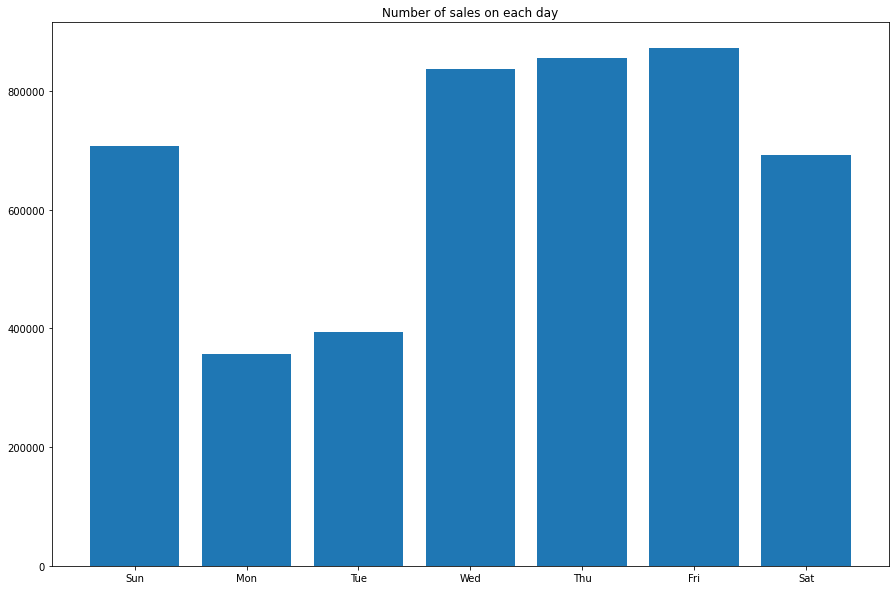

In [58]:
sales = data.groupby("Day")["Invoice_Value"].sum().reindex(["Sun","Mon","Tue","Wed","Thu","Fri","Sat"]).reset_index()
plt.figure(figsize=(15,10))
plt.bar(sales.Day,sales.Invoice_Value)
plt.title("Number of sales on each day") 
plt.show()

### Calculate the Revenue, Marketing spend, percentage of marketing spend out ofrevenue, Tax, percentage of delivery charges by month.


In [59]:
marketing_spend["Month"] = marketing_spend["Date"].dt.month.apply(lambda x:calendar.month_abbr[x])

In [60]:
Revenue = data.groupby("Month")["Invoice_Value"].sum().reindex(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]).reset_index()
ms = marketing_spend.groupby("Month")["Total_Spend"].sum().reindex(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]).reset_index()
dff = pd.merge(Revenue,ms,on="Month",how="outer")



In [61]:
dff.columns = ["Month","Revenue","Marketing_Spend"]




dff["Pct_Spend"] = (dff.Marketing_Spend/dff.Revenue)*100


In [62]:
dff

,Month,Revenue,Marketing_Spend,Pct_Spend
0,Jan,463883.05705,154928.95,33.398277
1,Feb,327896.56020,137107.92,41.814382
2,Mar,336805.20383,122250.09,36.296972
3,Apr,447999.19523,157026.83,35.050695
4,May,318556.30056,118259.64,37.123623
5,Jun,289830.32931,134318.14,46.343714
6,Jul,423982.34361,120217.85,28.354447
7,Aug,418160.56704,142904.15,34.174468
8,Sep,321128.35638,135514.54,42.199494
9,Oct,450837.46255,151224.65,33.543053


### % of delivery charges by month

In [63]:
dl = data.groupby("Month")[["Delivery_Charges","Invoice_Value"]].sum().reindex(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]).reset_index()
dl["Pct_Delivery_Charge"]=dl.Delivery_Charges/dl.Invoice_Value*100


In [64]:
dl

,Month,Delivery_Charges,Invoice_Value,Pct_Delivery_Charge
0,Jan,59242.32,463883.05705,12.770960
1,Feb,49216.60,327896.56020,15.009795
2,Mar,60799.94,336805.20383,18.051960
3,Apr,41481.74,447999.19523,9.259334
4,May,41396.17,318556.30056,12.994931
5,Jun,37513.58,289830.32931,12.943290
6,Jul,48723.93,423982.34361,11.491971
7,Aug,61099.57,418160.56704,14.611509
8,Sep,41005.42,321128.35638,12.769168
9,Oct,45961.88,450837.46255,10.194778


### Which product was appeared in the transactions?

In [65]:
data.groupby("Product_Description")["Transaction_ID"].count().idxmax()

'Nest Learning Thermostat 3rd Gen-USA - Stainless Steel'

### Which product was purchased mostly based on the quantity?

In [66]:
data.groupby("Product_Description")["Quantity"].sum().idxmax()

'Maze Pen'

-------------------------------------------------------------------------------------------------------------------------------

## RFM

In [67]:
df_rfm=df_final.copy()

In [68]:
monetary = df_rfm.groupby("CustomerID")["Invoice_Value"].sum()
monetary

CustomerID
12346      174.98174
12347    12090.29580
12348     1501.92620
12350     1183.71394
12356     1753.45086
            ...     
18259      816.40980
18260     2647.24033
18269      155.66092
18277      301.02000
18283     6970.80527
Name: Invoice_Value, Length: 1468, dtype: float64

In [69]:
frequency = df_rfm.CustomerID.value_counts()
frequency

12748    695
15311    587
14606    575
17841    572
14911    523
        ... 
17870      1
18233      1
16882      1
17633      1
16424      1
Name: CustomerID, Length: 1468, dtype: int64

In [70]:
# For Recency we can use the last transection date 
date_last_trans = df_rfm.groupby("CustomerID")["Date"].max()
date_last_trans

CustomerID
12346   2019-09-15
12347   2019-11-02
12348   2019-10-19
12350   2019-12-14
12356   2019-09-15
           ...    
18259   2019-04-05
18260   2019-10-05
18269   2019-06-20
18277   2019-10-23
18283   2019-10-10
Name: Date, Length: 1468, dtype: datetime64[ns]

In [71]:
recency = pd.datetime(2019,12,31)-date_last_trans

In [72]:
CustomerID = monetary.index

In [73]:
# Lets make the dataframe
rfm_df = pd.DataFrame([CustomerID,recency,frequency,monetary]).T
rfm_df.columns = ["CustomerID","Recency","Frequency","Monetary"]
rfm_df.Frequency = rfm_df.Frequency.astype("int")
rfm_df.Monetary = rfm_df.Monetary.astype("int")
rfm_df.Recency = rfm_df.Recency.dt.days

In [74]:
rfm_df.quantile([.33,.67])

,Recency,Frequency,Monetary
0.33,78.00,13.0,957.44
0.67,187.89,35.0,3053.67


In [75]:
rfm_df["r_seg"] = np.where(rfm_df.Recency<=78,"Active",np.where(rfm_df.Recency<=187.9,"At Risk","Churn"))
rfm_df["f_seg"] = np.where(rfm_df.Frequency<=13,1,np.where(rfm_df.Frequency<=35,2,3))
rfm_df["m_seg"] = np.where(rfm_df.Monetary<=940.11,1,np.where(rfm_df.Monetary<=3034.78,2,3))

In [76]:
# Lets also make the fm_seg 
rfm_df["fm_seg"] = np.where((rfm_df.f_seg==3)&(rfm_df.m_seg==3),"Platinum",
                            np.where(((rfm_df.f_seg==3)&(rfm_df.m_seg==2))|((rfm_df.f_seg==2)&(rfm_df.m_seg==3)),"Gold",
                            np.where(((rfm_df.f_seg==2)&(rfm_df.m_seg==2))|((rfm_df.f_seg==1)&(rfm_df.m_seg==3))|((rfm_df.f_seg==3)&(rfm_df.m_seg==1)),"Silver","Standard")))

In [77]:
profiling = pd.merge(df_rfm.groupby("CustomerID").sum().reset_index(),rfm_df,on="CustomerID")
profiling_output = profiling[["Avg_Price","Delivery_Charges","Discount_pct","GST","Invoice_Value","Recency","Frequency","Monetary","r_seg","fm_seg"]].groupby(["r_seg","fm_seg"]).mean().T
profiling_output.to_csv("E:/Dsc_analytixlabs/New_ML/Capstone Projects/14. Capstone Case Study - Finding-Marketing-Insights/rfm_segmentation.csv")


In [78]:
profiling_output

r_seg                  Active                                         \
fm_seg                   Gold     Platinum       Silver     Standard   
Avg_Price         3704.147578  4592.120824  2819.946772   787.642696   
Delivery_Charges   705.303594   827.726706   442.862975   118.800435   
Discount_pct        12.746875    15.385882     9.734810     3.278261   
GST                  8.506406     9.996588     5.992405     2.007043   
Invoice_Value     6323.538714  7693.845414  4240.484518  1122.500907   
Recency             35.890625    35.411765    36.183544    33.878261   
Frequency           55.820312    83.211765    25.683544    11.939130   
Monetary          6323.078125  7693.364706  4239.936709  1121.965217   

r_seg                 At Risk                                        \
fm_seg                   Gold     Platinum       Silver    Standard   
Avg_Price         2252.333333  3689.310638  1606.503202  550.401707   
Delivery_Charges   523.098333   838.173191   316.761854  122.272134   
Discount_pct        10.075000    13.474468     6.732022    2.865244   
GST                  7.322407    11.193830     4.850955    2.043354   
Invoice_Value     4118.597313  7451.560967  2618.697119  885.725189   
Recency            130.092593   123.638298   130.095506  133.591463   
Frequency           60.277778    72.425532    47.595506   12.060976   
Monetary          4118.037037  7451.000000  2618.224719  885.207317   

r_seg                   Churn                                        
fm_seg                   Gold     Platinum       Silver    Standard  
Avg_Price         2099.851609  2546.697895  1401.458941  487.263732  
Delivery_Charges   492.334713   692.881579   340.698706  124.992297  
Discount_pct         7.565517    10.436842     5.172353    2.393780  
GST                  5.600230     7.274211     3.913000    1.687751  
Invoice_Value     3967.868168  5234.622032  2522.566526  823.540830  
Recency            274.034483   263.368421   268.741176  263.856459  
Frequency           41.264368    82.157895    31.905882   11.177033  
Monetary          3967.356322  5234.105263  2522.082353  823.086124

### Strategies

Maintain Strategy: For the platinum customers having high frequency and high montary value some discount on recommendation  programmes itmes can be operated.

Reactivation Strategy: can be applied to those customers that have high monetary value but are in at risk category in the recency segment.

Win Back Strategy: can be applies to those who are wiliing to churn in Gold & Platnium category via Promocode to regain their loyalty.

-------------------------------------------------------------------------------------------------------------------------------

# K-Means Algo.

In [79]:
kmeans_df = df_final.copy()

In [80]:
kmeans_df.Location.unique()


array(['Chicago', 'California', 'New York', 'New Jersey', 'Washington DC'],
      dtype=object)

In [81]:
kmeans_df.Coupon_Status.unique()

array(['Not Used', 'Used', 'Clicked'], dtype=object)

In [82]:
kmeans_df.Product_Category.unique()

array(['Nest-USA', 'Office', 'Apparel', 'Bags', 'Drinkware', 'Lifestyle',
       'Notebooks & Journals', 'Headgear', 'Waze', 'Fun', 'Nest-Canada',
       'Backpacks', 'Google', 'Bottles', 'Gift Cards', 'More Bags',
       'Housewares', 'Android', 'Accessories', 'Nest'], dtype=object)

In [83]:
kmeans_df.columns

Index(['CustomerID', 'Gender', 'Location', 'Tenure_Months', 'Transaction_ID',
       'Product_SKU', 'Product_Description', 'Product_Category', 'Quantity',
       'Avg_Price', 'Delivery_Charges', 'Coupon_Status', 'GST', 'Month',
       'Date', 'Offline_Spend', 'Online_Spend', 'Total_Spend', 'Coupon_Code',
       'Discount_pct', 'Invoice_Value'],
      dtype='object')

In [84]:
# Since we will have to make dummy variables of all these categorical variables we should not add this product category column
# as it will be alot of dummies varaibles 
# so i i will consider only location,coupon_status and product for categorical vars.

In [85]:

# Columns to drop "Transaction_Date","Transaction_ID","Customer_ID","Product_SKU","Product_Description","Month"
kmeans_df.drop(["Date","Transaction_ID","CustomerID","Product_SKU","Product_Description","Month","Coupon_Code","Total_Spend","Product_Category"],axis=1,inplace=True)

# make dummy of location, Coupon_Status and Product_Category
kmeans_df = pd.get_dummies(kmeans_df,columns=["Gender","Location","Coupon_Status"],drop_first=True)

In [86]:
kmeans_df

,Tenure_Months,Quantity,Avg_Price,Delivery_Charges,GST,Offline_Spend,Online_Spend,Discount_pct,Invoice_Value,Gender_M,Location_Chicago,Location_New Jersey,Location_New York,Location_Washington DC,Coupon_Status_Not Used,Coupon_Status_Used
0,33,1,122.77,6.50,0.10,4500,2424.50,0.1,128.04230,1,1,0,0,0,1,0
1,33,1,2.47,102.79,0.10,4500,2424.50,0.1,105.23530,1,1,0,0,0,0,1
2,33,1,1.64,102.79,0.10,4500,2424.50,0.1,104.41360,1,1,0,0,0,0,0
3,33,1,1.64,102.79,0.10,4500,2424.50,0.1,104.41360,1,1,0,0,0,0,0
4,33,1,1.64,6.50,0.10,4500,2424.50,0.1,8.12360,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,19,1,151.88,6.50,0.10,4000,2058.75,0.3,123.44760,1,0,1,0,0,0,0
52920,19,5,80.52,6.50,0.10,4000,2058.75,0.3,316.50200,1,0,1,0,0,0,0
52921,19,2,80.52,6.50,0.10,4000,2058.75,0.3,130.50080,1,0,1,0,0,0,0
52922,19,1,3.47,6.50,0.18,4000,2058.75,0.3,9.36622,1,0,1,0,0,0,1


In [92]:
# Outlier Treatment
kmeans_df=kmeans_df.apply(lambda x:x.clip(lower=x.quantile(0.01),upper=x.quantile(0.99)))

## PCA

In [93]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
km_scaled = sc.fit_transform(kmeans_df)



In [97]:
pd.DataFrame(km_scaled).head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.509862,-0.309117,1.164799,-0.296926,-0.817509,1.782934,0.671265,-1.213179,0.448764,1.287333,1.370925,-0.304954,-0.517311,-0.233304,2.353438,-0.715018
1,0.509862,-0.309117,-0.802924,6.001888,-0.817509,1.782934,0.671265,-1.213179,0.212738,1.287333,1.370925,-0.304954,-0.517311,-0.233304,-0.424910,1.398566
2,0.509862,-0.309117,-0.816500,6.001888,-0.817509,1.782934,0.671265,-1.213179,0.204234,1.287333,1.370925,-0.304954,-0.517311,-0.233304,-0.424910,-0.715018
3,0.509862,-0.309117,-0.816500,6.001888,-0.817509,1.782934,0.671265,-1.213179,0.204234,1.287333,1.370925,-0.304954,-0.517311,-0.233304,-0.424910,-0.715018
4,0.509862,-0.309117,-0.816500,-0.296926,-0.817509,1.782934,0.671265,-1.213179,-0.792259,1.287333,1.370925,-0.304954,-0.517311,-0.233304,-0.424910,1.398566


In [99]:
from sklearn.decomposition import PCA
pc = PCA(n_components=16)
pc.fit(km_scaled)

PCA(n_components=16)

In [100]:
pc.explained_variance_  #Eigen value

array([2.1377553 , 1.501758  , 1.41069609, 1.31461807, 1.30304073,
       1.15617625, 1.12665825, 1.01216897, 0.96147767, 0.92852057,
       0.7036076 , 0.69539645, 0.65686048, 0.53244243, 0.39746685,
       0.16165862])

In [101]:
#Eigen values
sum(pc.explained_variance_)

16.00030232602081

In [102]:
#The amount of variance that each PC explains
var= pc.explained_variance_ratio_
var

array([0.13360718, 0.0938581 , 0.08816684, 0.08216208, 0.08143851,
       0.07225965, 0.07041481, 0.06325937, 0.06009122, 0.05803144,
       0.04397464, 0.04346146, 0.041053  , 0.03327702, 0.02484121,
       0.01010347])

In [103]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)
var1

array([ 13.36,  22.75,  31.57,  39.79,  47.93,  55.16,  62.2 ,  68.53,
        74.54,  80.34,  84.74,  89.09,  93.2 ,  96.53,  99.01, 100.02])

In [104]:
pd.DataFrame({'Eigen_value': pc.explained_variance_, 'Cumm_variance':var1}, index=range(1,17))

,Eigen_value,Cumm_variance
1,2.137755,13.36
2,1.501758,22.75
3,1.410696,31.57
4,1.314618,39.79
5,1.303041,47.93
6,1.156176,55.16
7,1.126658,62.20
8,1.012169,68.53
9,0.961478,74.54
10,0.928521,80.34


Approach 1: Try to trade-off between independent components (eigen value =1) and cummulative variance (around ~ 70%)

Therfore the  number of components have choosen as 9  based on cumulative variacne is explaining >74 % and individual component explaining >0.96 variance

In [106]:
pc_final=PCA(n_components=9).fit(km_scaled)

In [107]:
pc_final.explained_variance_

array([2.1377553 , 1.501758  , 1.41069609, 1.31461807, 1.30304073,
       1.15617625, 1.12665825, 1.01216897, 0.96147767])

In [109]:
reduced_cr=pc_final.fit_transform(km_scaled)  # the out put is Factors (F1, F2, ...F9)

In [110]:
dimensions = pd.DataFrame(reduced_cr)
dimensions.columns = ["C1","C2","C3", "C4", "C5","C6","C7","C8","C9"]

In [111]:
print(km_scaled.shape)

print(dimensions.shape)
print(dimensions.head())

(52924, 16)
(52924, 9)
         C1        C2        C3        C4        C5        C6        C7  \
0  1.714517 -0.866854 -1.854250  0.772977  1.814502  0.142190 -1.048960   
1  0.513814  3.419731 -1.901565  1.256538 -1.732086  0.452494 -0.970144   
2  0.520517  3.397905 -2.026156  1.538184 -0.271855  0.414384 -1.027004   
3  0.520517  3.397905 -2.026156  1.538184 -0.271855  0.414384 -1.027004   
4 -0.195349 -0.681504 -1.673507  0.481815 -1.624058  0.289525 -0.959997   

         C8        C9  
0 -0.624588 -1.354186  
1 -0.404522 -0.941661  
2 -0.424603 -0.972157  
3 -0.424603 -0.972157  
4 -0.652269 -1.314862  


Loading Matrix
Loadings=Eigenvectors * sqrt(Eigenvalues)

loadings are the covariances/correlations between the original variables and the unit-scaled components.

In [115]:
Loadings =  pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T,columns=kmeans_df.columns).T

In [116]:
Loadings.to_csv("Market_Loadings.csv")

## Segmentation

In [117]:
from sklearn.cluster import KMeans

In [119]:
km_3=KMeans(n_clusters=3,random_state=123).fit(dimensions)
km_4=KMeans(n_clusters=4,random_state=123).fit(dimensions)
km_5=KMeans(n_clusters=5,random_state=123).fit(dimensions)
km_6=KMeans(n_clusters=6,random_state=123).fit(dimensions)
km_7=KMeans(n_clusters=7,random_state=123).fit(dimensions)
km_8=KMeans(n_clusters=8,random_state=123).fit(dimensions)

In [121]:
kmeans_df['cluster_3'] = km_3.labels_
kmeans_df['cluster_4'] = km_4.labels_
kmeans_df['cluster_5'] = km_5.labels_
kmeans_df['cluster_6'] = km_6.labels_
kmeans_df['cluster_7'] = km_7.labels_
kmeans_df['cluster_8'] = km_8.labels_

In [122]:
kmeans_df.head()

,Tenure_Months,Quantity,Avg_Price,Delivery_Charges,GST,Offline_Spend,Online_Spend,Discount_pct,Invoice_Value,Gender_M,...,Location_New York,Location_Washington DC,Coupon_Status_Not Used,Coupon_Status_Used,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,33,1,122.77,6.5,0.1,4500,2424.5,0.1,128.0423,1,...,0,0,1,0,2,1,4,1,1,1
1,33,1,2.47,75.0,0.1,4500,2424.5,0.1,105.2353,1,...,0,0,0,1,0,3,3,3,3,3
2,33,1,1.64,75.0,0.1,4500,2424.5,0.1,104.4136,1,...,0,0,0,0,0,3,3,3,3,3
3,33,1,1.64,75.0,0.1,4500,2424.5,0.1,104.4136,1,...,0,0,0,0,0,3,3,3,3,3
4,33,1,1.64,6.5,0.1,4500,2424.5,0.1,8.1236,1,...,0,0,0,1,1,0,1,0,2,7


In [123]:
km_3.cluster_centers_

array([[ 0.52372651,  3.96268154, -0.21887428,  0.78080444, -0.10622556,
         0.14738052,  0.02208479,  0.18975322,  0.16552785],
       [-0.99333504, -0.14204897, -0.02098515,  0.0602735 , -0.01190546,
         0.00480858, -0.01277282, -0.03456752, -0.02401784],
       [ 1.77114441, -0.48091458,  0.08084001, -0.26092215,  0.0424734 ,
        -0.03688479,  0.01987543,  0.02924257,  0.01395665]])

In [124]:
pd.Series(km_3.labels_).value_counts()/sum(pd.Series(km_3.labels_).value_counts())

1    0.613219
2    0.325542
0    0.061239
dtype: float64

In [125]:
pd.Series(km_4.labels_).value_counts()/sum(pd.Series(km_4.labels_).value_counts())

0    0.486962
1    0.270029
2    0.187816
3    0.055192
dtype: float64

In [127]:
pd.Series(km_5.labels_).value_counts()/sum(pd.Series(km_5.labels_).value_counts())

1    0.435870
4    0.244520
0    0.186683
2    0.081173
3    0.051753
dtype: float64

In [128]:
pd.Series(km_6.labels_).value_counts()/sum(pd.Series(km_6.labels_).value_counts())

0    0.405393
1    0.226022
2    0.186947
5    0.081192
4    0.050317
3    0.050128
dtype: float64

In [134]:
pd.Series(km_7.labels_).value_counts()/sum(pd.Series(km_7.labels_).value_counts())

2    0.345684
4    0.199513
5    0.158416
1    0.116582
6    0.081079
0    0.050261
3    0.048466
dtype: float64

## Elbow Analysis

In [130]:
cluster_range = range( 2, 15 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( dimensions )
    cluster_errors.append( clusters.inertia_ )


In [131]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,num_clusters,cluster_errors
0,2,540820.060583
1,3,484360.967292
2,4,443480.460408
3,5,401038.150280
4,6,360317.368445
5,7,339575.583177
6,8,324113.319987
7,9,310276.615246
8,10,300371.957068
9,11,291338.103774


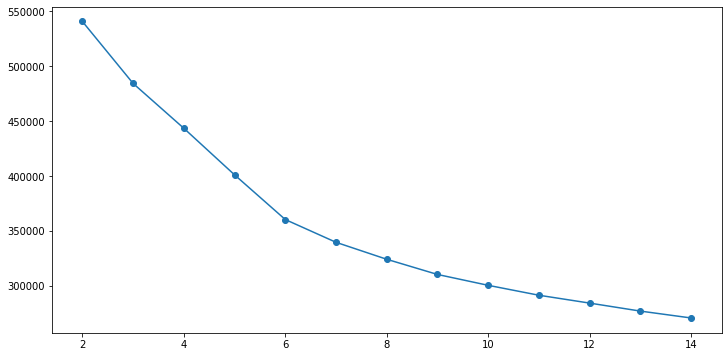

In [132]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Note:
The elbow diagram shows that the gain in explained variance reduces significantly from 6 to 7 to 8. So, optimal number of clusters could either 6 or 7.
The actual number of clusters chosen can be finally based on business context and convenience of dealing with number of segments or clusters.

## Profiling

In [135]:
size=pd.concat([pd.Series(kmeans_df.cluster_3.size), pd.Series.sort_index(kmeans_df.cluster_3.value_counts()), pd.Series.sort_index(kmeans_df.cluster_4.value_counts()),
           pd.Series.sort_index(kmeans_df.cluster_5.value_counts()), pd.Series.sort_index(kmeans_df.cluster_6.value_counts()),
           pd.Series.sort_index(kmeans_df.cluster_7.value_counts()), pd.Series.sort_index(kmeans_df.cluster_8.value_counts())])

In [136]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/kmeans_df.cluster_3.size, columns=['Seg_Pct'])

In [137]:
Seg_Pct.T
pd.concat([Seg_size.T, Seg_Pct.T], axis=0)

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,52924.0,3241.000000,32454.000000,17229.000000,25772.000000,14291.000000,9940.000000,2921.000000,9880.000000,23068.00000,...,8384.000000,4291.000000,4302.000000,4692.000000,9798.000000,2557.000000,3625.000000,2666.000000,7084.000000,18200.000000
Seg_Pct,1.0,0.061239,0.613219,0.325542,0.486962,0.270029,0.187816,0.055192,0.186683,0.43587,...,0.158416,0.081079,0.081286,0.088655,0.185133,0.048315,0.068494,0.050374,0.133852,0.343889


In [139]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([kmeans_df.apply(lambda x: x.mean()).T, kmeans_df.groupby('cluster_3').apply(lambda x: x.mean()).T, kmeans_df.groupby('cluster_4').apply(lambda x: x.mean()).T,
          kmeans_df.groupby('cluster_5').apply(lambda x: x.mean()).T, kmeans_df.groupby('cluster_6').apply(lambda x: x.mean()).T,
          kmeans_df.groupby('cluster_7').apply(lambda x: x.mean()).T, kmeans_df.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)


In [140]:
Profling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)

In [141]:
#Profling_output_final.columns = ['Seg_' + str(i) for i in Profling_output_final.columns]
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]

In [142]:
Profling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,...,KM7_6,KM7_7,KM8_1,KM8_2,KM8_3,KM8_4,KM8_5,KM8_6,KM8_7,KM8_8
Seg_size,52924.000000,3241.000000,32454.000000,17229.000000,25772.000000,14291.000000,9940.000000,2921.000000,9880.000000,23068.000000,...,8384.000000,4291.000000,4302.000000,4692.000000,9798.000000,2557.000000,3625.000000,2666.000000,7084.000000,18200.000000
Seg_Pct,1.000000,0.061239,0.613219,0.325542,0.486962,0.270029,0.187816,0.055192,0.186683,0.435870,...,0.158416,0.081079,0.081286,0.088655,0.185133,0.048315,0.068494,0.050374,0.133852,0.343889
Tenure_Months,26.127995,25.648565,26.157669,26.162285,26.650202,26.367504,24.586720,25.593632,24.584413,26.676738,...,24.495587,26.005360,25.997908,26.622975,26.428863,25.565115,25.604966,26.880720,24.362789,26.629231
Quantity,3.635118,27.552916,2.339588,1.576238,2.396826,1.607585,2.279577,29.093119,2.292308,2.415727,...,2.324070,2.483570,2.482334,2.345908,1.601143,30.988659,1.685241,2.359340,2.618436,2.462912
Avg_Price,51.558093,9.620852,14.671245,128.930220,14.766953,132.076404,43.485401,9.701417,42.927643,14.804012,...,42.907159,49.891836,50.342559,44.702225,132.399127,9.567118,127.271250,55.823425,14.376310,14.758732
Delivery_Charges,9.729090,38.874573,8.169060,7.185048,8.334367,7.210526,8.130832,39.795601,8.154660,8.437047,...,8.154340,8.366041,8.360339,8.178406,7.224969,40.829871,7.239788,8.858635,8.571215,8.505001
GST,0.137462,0.137778,0.161268,0.092558,0.161096,0.091995,0.141657,0.137111,0.141986,0.160769,...,0.142041,0.140096,0.139900,0.141669,0.091752,0.136645,0.092996,0.137168,0.160198,0.160574
Offline_Spend,2830.914141,2752.823203,2767.400012,2965.244646,2790.858296,3011.706669,2689.718310,2780.280726,2684.817814,2805.990983,...,2685.830153,2737.357259,2738.958624,2852.387042,3033.496632,2793.077826,2833.793103,2787.359340,2665.796160,2813.445055
Online_Spend,1890.258294,1880.743215,1853.497093,1961.294710,1841.786685,1963.392469,1910.454188,1891.388946,1908.259311,1839.268644,...,1905.960786,1896.766038,1898.506957,1884.069154,1953.605264,1894.061341,2011.935923,1848.463751,1887.681052,1838.156960
Discount_pct,0.198779,0.193490,0.197994,0.201254,0.198766,0.201323,0.196811,0.193153,0.196680,0.198504,...,0.196112,0.202657,0.202580,0.202025,0.203358,0.191474,0.196414,0.189760,0.195384,0.198720


In [143]:
Profling_output_final.to_csv('Profiling_output.csv')

-------------------------------------------------------------------------------------------------------------------------------

## Cross-Selling(Recommendation)

In [145]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [148]:
df_mba = df_final[["CustomerID","Product_Description","Quantity"]]

In [152]:
# Convert the units to 1 hot encoded values
def encode_units(x):
    
    if x>0:
        return 1
    else:
        return 0   

In [155]:
basket_sets = input_data = df_mba.pivot_table(columns = "Product_Description",index = "CustomerID",values="Quantity").fillna(0).applymap(encode_units)

In [156]:
basket_sets.head()

Product_Description,1 oz Hand Sanitizer,20 oz Stainless Steel Insulated Tumbler,22 oz Android Bottle,22 oz YouTube Bottle Infuser,23 oz Wide Mouth Sport Bottle,24 oz YouTube Sergeant Stripe Bottle,25L Classic Rucksack,26 oz Double Wall Insulated Bottle,7&quot; Dog Frisbee,8 pc Android Sticker Sheet,...,YouTube Twill Cap,YouTube Women's Favorite Tee White,YouTube Women's Fleece Hoodie Black,YouTube Women's Racer Back Tank Black,YouTube Women's Short Sleeve Hero Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Grey,YouTube Womens 3/4 Sleeve Baseball Raglan White/Black,YouTube Wool Heather Cap Heather/Black,YouTube Youth Short Sleeve Tee Red
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
12348,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12356,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
# Build up the frequent items
#Now that the data is structured properly, we can generate frequent item sets that have a support of 
#at least 7% (this number was chosen so that I could get enough useful examples):
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

In [158]:
frequent_itemsets.sort_values(by='support', ascending=False)

,support,itemsets
67,0.649183,(Nest Cam Indoor Security Camera - USA)
70,0.648501,(Nest Learning Thermostat 3rd Gen-USA - Stainl...
68,0.647139,(Nest Cam Outdoor Security Camera - USA)
527,0.539510,"(Nest Cam Outdoor Security Camera - USA, Nest ..."
529,0.525204,"(Nest Cam Indoor Security Camera - USA, Nest L..."
...,...,...
2244,0.070163,"(Google Laptop and Cell Phone Stickers, Nest L..."
4028,0.070163,"(Nest Cam Outdoor Security Camera - USA, Nest ..."
1849,0.070163,"(Nest Cam Outdoor Security Camera - USA, Nest ..."
3517,0.070163,"(Nest Cam Outdoor Security Camera - USA, Nest ..."


### Rules

In [160]:
rules = association_rules(frequent_itemsets,min_threshold=1,metric="lift")


In [161]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(22 oz Android Bottle),(Nest Cam Indoor Security Camera - USA),0.082425,0.649183,0.074251,0.900826,1.387632,0.020742,3.537409
1,(Nest Cam Indoor Security Camera - USA),(22 oz Android Bottle),0.649183,0.082425,0.074251,0.114376,1.387632,0.020742,1.036077
2,(Nest Cam Outdoor Security Camera - USA),(22 oz Android Bottle),0.647139,0.082425,0.071526,0.110526,1.340931,0.018185,1.031593
3,(22 oz Android Bottle),(Nest Cam Outdoor Security Camera - USA),0.082425,0.647139,0.071526,0.867769,1.340931,0.018185,2.668512
4,(22 oz Android Bottle),(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.082425,0.648501,0.070163,0.851240,1.312626,0.016711,2.362852


In [162]:
rules.sort_values(by='confidence', ascending=False )[:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
57029,"(Nest Cam Outdoor Security Camera - USA, Googl...",(Nest Cam Indoor Security Camera - USA),0.070845,0.649183,0.070845,1.0,1.540399,0.024854,inf
44485,"(Nest Cam Outdoor Security Camera - USA, Nest ...",(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.072888,0.648501,0.072888,1.0,1.542017,0.025620,inf
10819,"(Google 22 oz Water Bottle, Google Men's 100% ...",(Nest Cam Indoor Security Camera - USA),0.077657,0.649183,0.077657,1.0,1.540399,0.027243,inf
41902,(Nest Protect Smoke + CO White Battery Alarm-U...,(Nest Cam Indoor Security Camera - USA),0.071526,0.649183,0.071526,1.0,1.540399,0.025093,inf
41423,"(Google Twill Cap, Nest Protect Smoke + CO Whi...",(Nest Cam Indoor Security Camera - USA),0.077657,0.649183,0.077657,1.0,1.540399,0.027243,inf
41393,"(Google Twill Cap, Nest Learning Thermostat 3r...",(Nest Cam Indoor Security Camera - USA),0.070845,0.649183,0.070845,1.0,1.540399,0.024854,inf
41363,"(Google Twill Cap, Google Sunglasses, Nest Lea...",(Nest Cam Indoor Security Camera - USA),0.089237,0.649183,0.089237,1.0,1.540399,0.031306,inf
40615,"(Nest Cam Outdoor Security Camera - USA, Googl...",(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.076975,0.648501,0.076975,1.0,1.542017,0.027057,inf
57091,(Nest Learning Thermostat 3rd Gen-USA - Stainl...,(Nest Cam Indoor Security Camera - USA),0.072207,0.649183,0.072207,1.0,1.540399,0.025332,inf
39353,(Nest Protect Smoke + CO White Battery Alarm-U...,(Nest Cam Indoor Security Camera - USA),0.083106,0.649183,0.083106,1.0,1.540399,0.029155,inf


In [163]:
# The itemsets that have higher lift than 3 and they also have a high confidence 0f 0.8 or above
rules[ (rules['lift'] >= 3) &
       (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2960,"(Nest Secure Alarm System Starter Pack - USA, ...",(Nest Thermostat E - USA),0.085150,0.229564,0.070163,0.824000,3.589412,0.050616,4.377477
4124,"(Nest Secure Alarm System Starter Pack - USA, ...",(Nest Thermostat E - USA),0.091962,0.229564,0.073569,0.800000,3.484866,0.052458,3.852180
6266,"(Nest Secure Alarm System Starter Pack - USA, ...",(Nest Thermostat E - USA),0.085831,0.229564,0.073569,0.857143,3.733786,0.053866,5.393052
7094,"(Nest Secure Alarm System Starter Pack - USA, ...",(Nest Thermostat E - USA),0.108311,0.229564,0.090599,0.836478,3.643768,0.065735,4.711512
7436,"(Nest Secure Alarm System Starter Pack - USA, ...",(Nest Thermostat E - USA),0.149183,0.229564,0.122616,0.821918,3.580342,0.088369,4.326294
...,...,...,...,...,...,...,...,...,...
67749,"(Nest Cam Outdoor Security Camera - USA, Nest ...","(Nest Cam Indoor Security Camera - USA, Nest T...",0.083787,0.194142,0.070163,0.837398,4.313336,0.053897,4.956029
67759,"(Nest Cam Outdoor Security Camera - USA, Nest ...",(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.083787,0.201635,0.070163,0.837398,4.153043,0.053269,4.909946
67764,(Nest Learning Thermostat 3rd Gen-USA - Stainl...,"(Nest Cam Outdoor Security Camera - USA, Nest ...",0.085150,0.185967,0.070163,0.824000,4.430886,0.054328,4.625186
67780,"(Nest Cam Outdoor Security Camera - USA, Nest ...","(Nest Cam Indoor Security Camera - USA, Nest L...",0.085831,0.177112,0.070163,0.817460,4.615507,0.054962,4.507997


-------------------------------------------------------------------------------------------------------------------------------

## Lifetime value of customers

In [165]:
df_lifetime_value=df_final.copy()

In [166]:
df_lifetime_value.groupby('CustomerID')['Invoice_Value'].sum().quantile([0.33,0.66])

0.33     957.613335
0.66    2937.843014
Name: Invoice_Value, dtype: float64

In [167]:
def value(x):
    if x["Invoice_Value"]<=1089:
        x["Value"]="Low"
    elif (x["Invoice_Value"]>=1089) & (x["Invoice_Value"]<=3380):
        x["Value"] = "Medium"
    else:
        x["Value"] = "High"
    return x

In [168]:
df_lifetime_value.groupby("CustomerID").sum().apply(value,axis=1)["Value"]

CustomerID
12346       Low
12347      High
12348    Medium
12350    Medium
12356    Medium
          ...  
18259       Low
18260    Medium
18269       Low
18277       Low
18283      High
Name: Value, Length: 1468, dtype: object

In [169]:
Data = df_lifetime_value.drop(["Transaction_ID","Avg_Price","Product_SKU","Product_Description","Product_Category","Month","Coupon_Code","Discount_pct"],axis=1)
Data.head(2)

,CustomerID,Gender,Location,Tenure_Months,Quantity,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Total_Spend,Invoice_Value
0,12583,M,Chicago,33,1,6.50,Not Used,0.1,2019-01-01,4500,2424.5,6924.5,128.0423
1,12583,M,Chicago,33,1,102.79,Used,0.1,2019-01-01,4500,2424.5,6924.5,105.2353


In [171]:
df_D= Data.groupby("CustomerID").agg({"Invoice_Value":np.mean,"Delivery_Charges":np.mean,"Quantity":np.mean,"Location":max,"Gender":max,"Coupon_Status":max,"Tenure_Months":max})
df_D["Value"] = df_lifetime_value.groupby("CustomerID").sum().apply(value,axis=1)["Value"]
df_D.head()

,Invoice_Value,Delivery_Charges,Quantity,Location,Gender,Coupon_Status,Tenure_Months,Value
CustomerID,,,,,,,,
12346,87.490870,75.000000,1.500000,New York,F,Used,31,Low
12347,201.504930,11.085667,5.700000,New York,M,Used,20,High
12348,65.301139,8.571739,9.086957,California,M,Used,39,Medium
12350,69.630232,7.522353,1.235294,California,M,Used,25,Medium
12356,48.706968,17.708056,1.555556,Chicago,F,Used,31,Medium


In [173]:
df_D = pd.get_dummies(df_D,columns = ["Location","Gender","Coupon_Status"])
df_D.columns

Index(['Invoice_Value', 'Delivery_Charges', 'Quantity', 'Tenure_Months',
       'Value', 'Location_California', 'Location_Chicago',
       'Location_New Jersey', 'Location_New York', 'Location_Washington DC',
       'Gender_F', 'Gender_M', 'Coupon_Status_Clicked',
       'Coupon_Status_Not Used', 'Coupon_Status_Used'],
      dtype='object')

In [175]:
X = df_D[['Invoice_Value', 'Delivery_Charges', 'Quantity',
       'Location_California', 'Location_Chicago', 'Location_New Jersey',
       'Location_New York', 'Location_Washington DC', 'Gender_F', 'Gender_M',
       'Coupon_Status_Clicked', 'Coupon_Status_Not Used',
       'Coupon_Status_Used']]
Y = df_D["Value"]

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [177]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=123)

In [178]:
log_reg = LogisticRegression(C=0.01).fit(X_train,y_train)
yhat = log_reg.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, log_reg.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))  

Train set Accuracy:  0.479557069846678
Test set Accuracy:  0.4965986394557823


In [179]:
print(metrics.classification_report(y_test, yhat)) 

              precision    recall  f1-score   support

        High       0.35      0.23      0.28        73
         Low       0.56      0.74      0.64       117
      Medium       0.46      0.41      0.44       104

    accuracy                           0.50       294
   macro avg       0.46      0.46      0.45       294
weighted avg       0.48      0.50      0.48       294



## Gradient boost classifier

In [199]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train) 
yhat = clf.predict(X_test)  

In [201]:
print(metrics.classification_report(y_test, yhat))  

              precision    recall  f1-score   support

        High       0.44      0.63      0.52        73
         Low       0.85      0.68      0.76       117
      Medium       0.47      0.43      0.45       104

    accuracy                           0.58       294
   macro avg       0.59      0.58      0.58       294
weighted avg       0.61      0.58      0.59       294



-------------------------------------------------------------------------------------------------------------------------------

## Predicting Next Purchases

In [181]:
df_pnp=df_final.copy()

In [183]:
df_pnp["Date"] = pd.to_datetime(df_pnp.Date)
df_pnp["Month_Num"] = pd.to_datetime(df_pnp.Date).dt.month

In [184]:
df_pnp.groupby("CustomerID")["Date"].max()-df_pnp.groupby("CustomerID")["Date"].min()


CustomerID
12346     0 days
12347   223 days
12348   119 days
12350     0 days
12356     0 days
          ...   
18259     0 days
18260   105 days
18269    76 days
18277     0 days
18283    73 days
Name: Date, Length: 1468, dtype: timedelta64[ns]

In [188]:
data_f["Days_Bw_Purchase"] = data_f.Days_Bw_Purchase.dt.days

In [189]:
def group(x):
    if x<31:
        return "0-30 Days"
    elif x>30 and x<61:
        return "30-60 Days"
    elif x>60 and x<91:
        return "60-90 Days"
    else:
        return "90+ Days"

In [190]:
data_f["Purchase_Category"] = data_f.Days_Bw_Purchase.apply(group)
data_f = pd.get_dummies(data_f,columns = ["Location","Gender","Coupon_Status"],drop_first=True)
data_f.head()

,Invoice_Value,Delivery_Charges,Quantity,Tenure_Months,Days_Bw_Purchase,Purchase_Category,Location_Chicago,Location_New Jersey,Location_New York,Location_Washington DC,Gender_M,Coupon_Status_Not Used,Coupon_Status_Used
CustomerID,,,,,,,,,,,,,
12346,87.490870,75.000000,2.0,31,0,0-30 Days,0,0,1,0,0,0,1
12347,201.504930,11.085667,6.0,20,223,90+ Days,0,0,1,0,1,0,1
12348,65.301139,8.571739,9.0,39,119,90+ Days,0,0,0,0,1,0,1
12350,69.630232,7.522353,1.0,25,0,0-30 Days,0,0,0,0,1,0,1
12356,48.706968,17.708056,2.0,31,0,0-30 Days,1,0,0,0,0,0,1


-------------------------------------------------------------------------------------------------------------------------------

# Cohort Analysis

In [191]:
# i get the method from the internet website: https://thecleverprogrammer.com/2021/01/08/cohort-analysis-with-python/

In [192]:

cohort_df = df_final.copy()

In [193]:
cohort_df["Cohort_Date"] = cohort_df.groupby("CustomerID")["Date"].transform(min)
cohort_df["Cohort_Month"] = cohort_df["Cohort_Date"].dt.month

In [194]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    date = df[column].dt.date
    return year, month, date

Invoice_Year, Invoice_Month, _ = get_date_int(cohort_df, 'Date')
Cohort_Year, Cohort_Month , _ = get_date_int(cohort_df, 'Cohort_Date')

Year_Diff = Invoice_Year - Cohort_Year
Month_Diff = Invoice_Month - Cohort_Month

cohort_df['Cohort_Index'] = Year_Diff*12 + Month_Diff +1

In [195]:
cohort_df.groupby("Cohort_Month").count()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,...,Month,Date,Offline_Spend,Online_Spend,Total_Spend,Coupon_Code,Discount_pct,Invoice_Value,Cohort_Date,Cohort_Index
Cohort_Month,,,,,,,,,,,,,,,,,,,,,
1,10938,10938,10938,10938,10938,10938,10938,10938,10938,10938,...,10938,10938,10938,10938,10938,10938,10938,10938,10938,10938
2,6214,6214,6214,6214,6214,6214,6214,6214,6214,6214,...,6214,6214,6214,6214,6214,6214,6214,6214,6214,6214
3,7669,7669,7669,7669,7669,7669,7669,7669,7669,7669,...,7669,7669,7669,7669,7669,7669,7669,7669,7669,7669
4,5015,5015,5015,5015,5015,5015,5015,5015,5015,5015,...,5015,5015,5015,5015,5015,5015,5015,5015,5015,5015
5,4539,4539,4539,4539,4539,4539,4539,4539,4539,4539,...,4539,4539,4539,4539,4539,4539,4539,4539,4539,4539
6,3754,3754,3754,3754,3754,3754,3754,3754,3754,3754,...,3754,3754,3754,3754,3754,3754,3754,3754,3754,3754
7,2984,2984,2984,2984,2984,2984,2984,2984,2984,2984,...,2984,2984,2984,2984,2984,2984,2984,2984,2984,2984
8,3691,3691,3691,3691,3691,3691,3691,3691,3691,3691,...,3691,3691,3691,3691,3691,3691,3691,3691,3691,3691
9,1893,1893,1893,1893,1893,1893,1893,1893,1893,1893,...,1893,1893,1893,1893,1893,1893,1893,1893,1893,1893


In [196]:
#Count monthly active customers from each cohort
grouping = cohort_df.groupby(['Cohort_Month', 'Cohort_Index'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
# Return number of unique elements in the object.
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='Cohort_Month',columns='Cohort_Index',values='CustomerID')

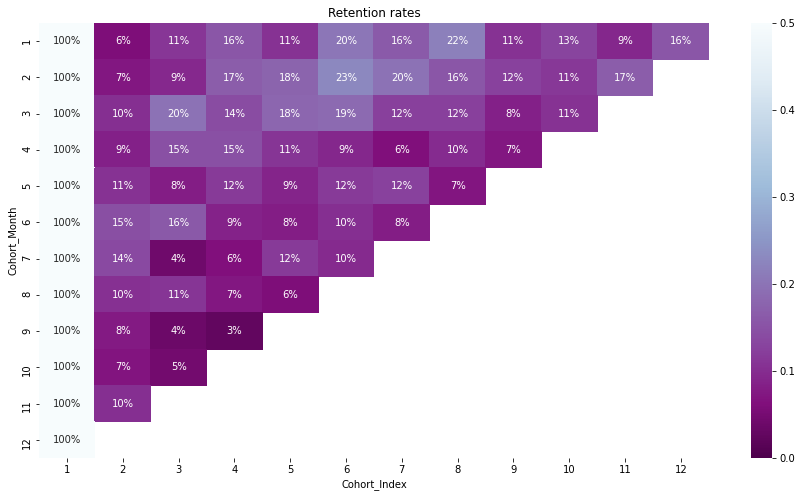

In [197]:
# Retention table
cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size,axis=0) #axis=0 to ensure the divide along the row axis 
retention.round(3) * 100 #to show the number as percentage

#Build the heatmap
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data=retention,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap="BuPu_r")
plt.show()